In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
path = './'

In [3]:
A, B, T = -1, 1, 1
Nt, Nx = 101, 201

def f(x):
    # Initial conditions
    return x**2 * torch.cos(torch.pi * x)

def g(t):
    return -torch.ones_like(t)

t = torch.linspace(0, T, Nt)
x = torch.linspace(A, B, Nx)

initial_values = f(x)
left_boundary = g(t)
right_boundary = g(t)

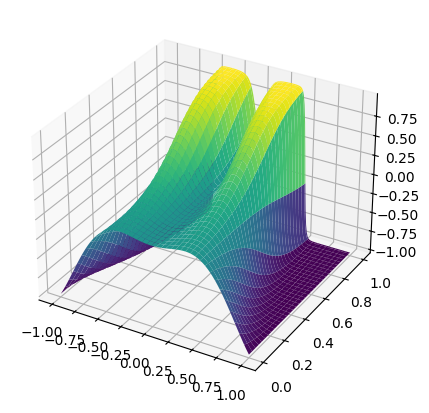

In [4]:
mat = loadmat('./Allen_Cahn.mat')
t = mat['t'][0]
x = mat['x'][0]
u = mat['u']

x_pts, t_pts = np.meshgrid(x, t)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_pts, t_pts, u, cmap='viridis')
plt.show()

In [5]:
solution = np.stack([t_pts.flatten(), x_pts.flatten(), u.flatten()]).T
np.save(path + 'solution.npy', solution)

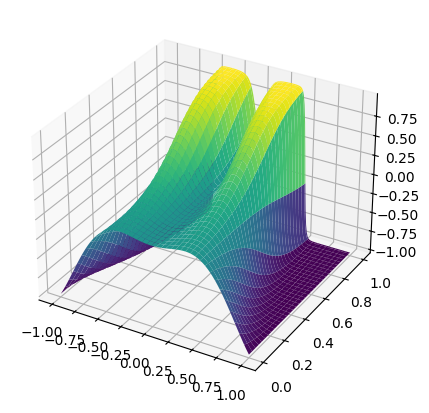

In [6]:
sol = np.load('./solution.npy')

ts = sol[:, 0].reshape(Nt, Nx)
xs = sol[:, 1].reshape(Nt, Nx)
us = sol[:, 2].reshape(Nt, Nx)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xs, ts, us, cmap='viridis')
plt.show()

In [7]:
def get_random_subset(N_I, N_A, N_B):
    init_pts = torch.rand((N_I)).sort().values * (B - A) + A
    left_pts = torch.rand((N_A)).sort().values * T
    right_pts = torch.rand((N_B)).sort().values * T

    init_data = f(init_pts)
    left_data = g(left_pts)
    right_data = g(right_pts)
    
    points = [
        torch.vstack([torch.zeros_like(init_pts), init_pts]).T,
        torch.vstack([left_pts, torch.ones_like(left_pts) * A]).T,
        torch.vstack([right_pts, torch.ones_like(right_pts) * B]).T,
    ]

    targets = [
        init_data.reshape(-1, 1), 
        left_data.reshape(-1, 1), 
        right_data.reshape(-1, 1)
    ]
    
    return (points, targets)

points, targets = get_random_subset(128, 128, 128)

for pts, data, name in zip(points, targets, ['init', 'left', 'right']):
    values = torch.hstack([pts, data])
    np.save(path + name + '_data.npy', values)